In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading csv file
df = pd.read_csv(r"D:\IMDB_Movies.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Data Cleaning and Preprocessing 

In [4]:
df.shape

(5043, 28)

In [5]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
for i in df.columns:
    if df[i].isnull().sum()!=0:
        print(i)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
actor_1_name
actor_3_name
facenumber_in_poster
plot_keywords
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
aspect_ratio


In [8]:
df.skew()

num_critic_for_reviews        1.516533
duration                      2.339134
director_facebook_likes       5.229701
actor_3_facebook_likes        7.279021
actor_1_facebook_likes       19.121776
gross                         3.127204
num_voted_users               4.029871
cast_total_facebook_likes    12.831928
facenumber_in_poster          4.384766
budget                       48.157435
title_year                   -2.292273
actor_2_facebook_likes        9.884733
imdb_score                   -0.741471
aspect_ratio                  9.390056
movie_facebook_likes          5.058927
dtype: float64

In [9]:
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df['duration'] = df['duration'].fillna(df['duration'].median())
df['director_facebook_likes'] = df['director_facebook_likes'].fillna(df['director_facebook_likes'].median())
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median())
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median())
df['plot_keywords'] = df['plot_keywords'].fillna(df['plot_keywords'].mode()[0])
df['content_rating'] = df['content_rating'].fillna(df['content_rating'].mode()[0])
df['content_rating'] = df['content_rating'].fillna(df['content_rating'].mode())
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].median())
df['aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].median())
df['budget'] = df['budget'].fillna(df['budget'].median())

In [10]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                  0
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating                 0
budget                         0
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [11]:
a = []
for i in df['num_user_for_reviews'].unique():
    if not str(i).isdigit():
        a.append(i)
print(a)

[' ', nan]


In [12]:
df['num_user_for_reviews'] = df['num_user_for_reviews'].replace({' ':'NaN', 'nan':'NaN'})
df['num_user_for_reviews'] = df['num_user_for_reviews'].astype(float)
df['num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())

In [13]:
for i in df.columns:
    if df[i].isnull().sum()!=0:
        print(i)

director_name
actor_2_name
actor_1_name
actor_3_name
language
country
title_year


In [14]:
df = df.dropna()
df.shape

(4907, 28)

In [15]:
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].astype(int)
df['duration'] = df['duration'].astype(int)
df['director_facebook_likes'] = df['director_facebook_likes'].astype(int)
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].astype(int)
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].astype(int)
df['facenumber_in_poster'] = df['facenumber_in_poster'].astype(int)
df['num_user_for_reviews'] = df['num_user_for_reviews'].astype(int)
df['title_year'] = df['title_year'].astype(int)
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4907 non-null   object 
 1   director_name              4907 non-null   object 
 2   num_critic_for_reviews     4907 non-null   int32  
 3   duration                   4907 non-null   int32  
 4   director_facebook_likes    4907 non-null   int32  
 5   actor_3_facebook_likes     4907 non-null   int32  
 6   actor_2_name               4907 non-null   object 
 7   actor_1_facebook_likes     4907 non-null   int32  
 8   gross                      4907 non-null   float64
 9   genres                     4907 non-null   object 
 10  actor_1_name               4907 non-null   object 
 11  movie_title                4907 non-null   object 
 12  num_voted_users            4907 non-null   int64  
 13  cast_total_facebook_likes  4907 non-null   int64

In [17]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [18]:
# descriptive statistics of dataset
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000,4.907000e+03,4.907000e+03,4907.000000,4907.000000,4907.000000,4.907000e+03,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,142.765030,108.232729,690.580803,652.239861,6645.082128,4.504205e+07,8.529578e+04,9844.803546,1.369065,277.308131,3.839363e+07,2002.514163,1682.290401,6.415284,2.141025,7631.675973
std,121.137423,22.491916,2822.010326,1682.976278,14745.396211,6.351477e+07,1.398740e+05,18006.288659,2.013844,380.823183,1.985402e+08,12.284006,4087.671864,1.113942,0.741621,19501.385552
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,54.000000,94.000000,7.000000,133.000000,623.000000,8.106158e+06,9.183500e+03,1440.000000,0.000000,68.500000,7.000000e+06,1999.000000,284.000000,5.800000,1.850000,0.000000
50%,112.000000,104.000000,49.000000,373.000000,998.000000,2.551750e+07,3.544600e+04,3144.000000,1.000000,160.000000,2.000000e+07,2005.000000,602.000000,6.500000,2.350000,166.000000
75%,196.000000,118.000000,197.000000,637.000000,11000.000000,5.272665e+07,9.850350e+04,14130.000000,2.000000,332.000000,4.000000e+07,2011.000000,922.000000,7.200000,2.350000,3000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [19]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.252418,0.180751,0.271149,0.195282,0.485043,0.624182,0.267252,-0.033491,0.606421,0.120608,0.276416,0.279865,0.333588,0.018943,0.689413
duration,0.252418,1.000000,0.173301,0.132522,0.088874,0.247979,0.342082,0.125995,0.027435,0.353404,0.074462,-0.133478,0.136853,0.344437,0.041523,0.218082
director_facebook_likes,0.180751,0.173301,1.000000,0.120081,0.093683,0.144117,0.296618,0.121857,-0.041870,0.221635,0.022121,-0.065765,0.119313,0.172310,-0.001573,0.161658
actor_3_facebook_likes,0.271149,0.132522,0.120081,1.000000,0.256944,0.314958,0.286157,0.483139,0.101012,0.228884,0.048669,0.096194,0.559103,0.058067,0.008989,0.279215
actor_1_facebook_likes,0.195282,0.088874,0.093683,0.256944,1.000000,0.158170,0.197828,0.950133,0.068948,0.149121,0.024984,0.085287,0.401689,0.080198,0.009003,0.139876
gross,0.485043,0.247979,0.144117,0.314958,0.158170,1.000000,0.638828,0.249505,-0.025865,0.564304,0.111718,0.042089,0.271536,0.186394,0.011959,0.385019
num_voted_users,0.624182,0.342082,0.296618,0.286157,0.197828,0.638828,1.000000,0.269579,-0.027957,0.797542,0.082062,0.005994,0.268669,0.430074,0.004503,0.537203
cast_total_facebook_likes,0.267252,0.125995,0.121857,0.483139,0.950133,0.249505,0.269579,1.000000,0.089003,0.209459,0.038958,0.109125,0.640883,0.092019,0.011695,0.213834
facenumber_in_poster,-0.033491,0.027435,-0.041870,0.101012,0.068948,-0.025865,-0.027957,0.089003,1.000000,-0.069992,-0.019163,0.060535,0.072760,-0.068599,0.010924,0.008453
num_user_for_reviews,0.606421,0.353404,0.221635,0.228884,0.149121,0.564304,0.797542,0.209459,-0.069992,1.000000,0.086887,-0.005779,0.217062,0.309205,0.002168,0.400127


<Axes: >

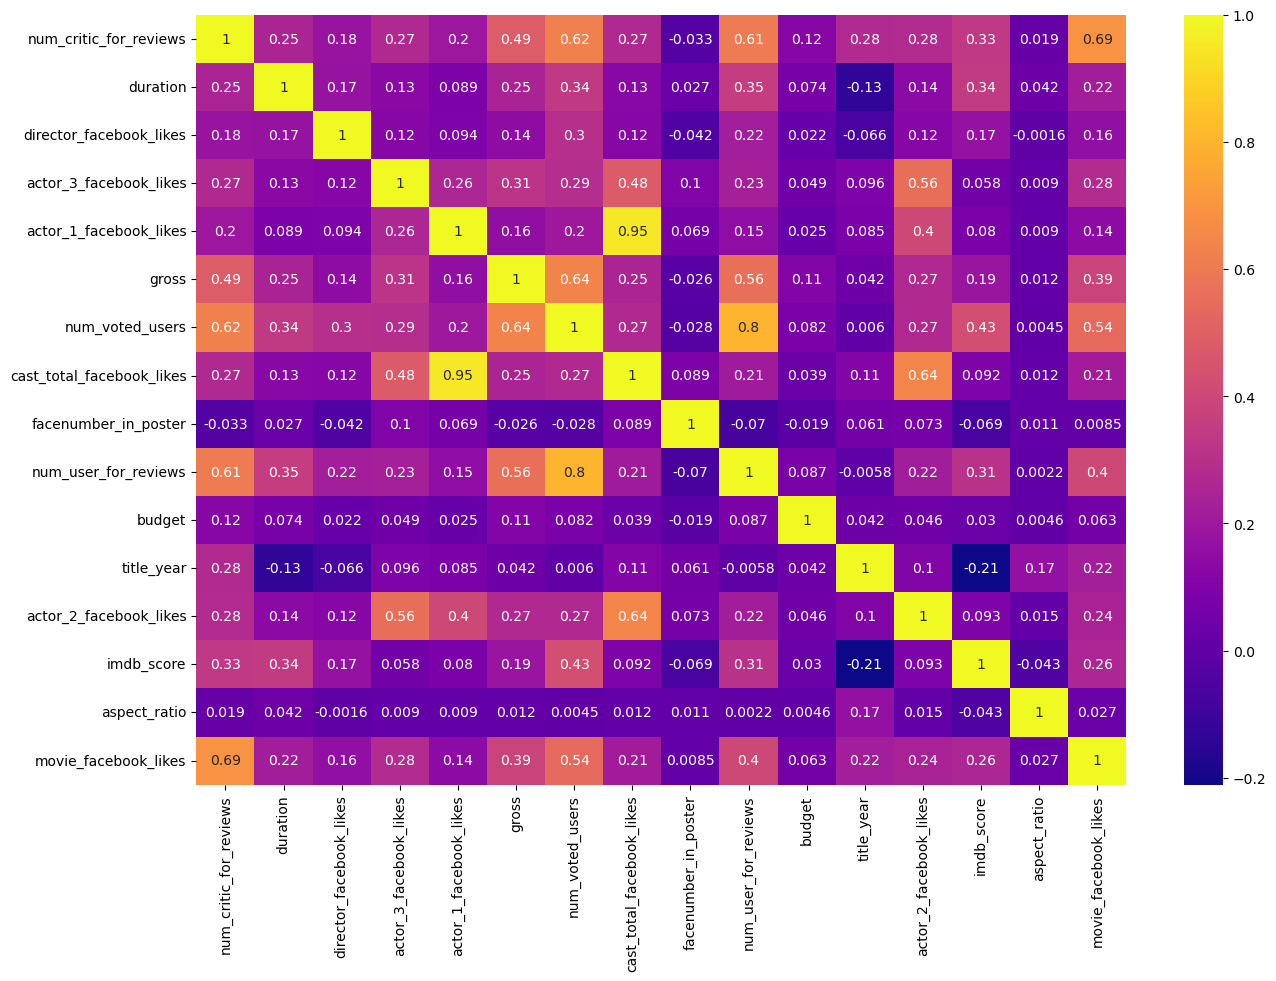

In [20]:
# corrrelation matrix - heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='plasma')

In [21]:
# from the above correlation matrix could infer that 
# Note : Consider imdb_score as target and rest all are independent features
# the features - 'movie_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users' - seems to be less correlated with target
# 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes' are highly correlated with 'cast_total_facebook_likes'

In [22]:
df = df.drop(['movie_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users'], axis=1)

In [23]:
df = df.drop(['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes'], axis=1)

In [24]:
# saving the file to local
df.to_csv(r"D:\imdb\imbd_dataset.csv")